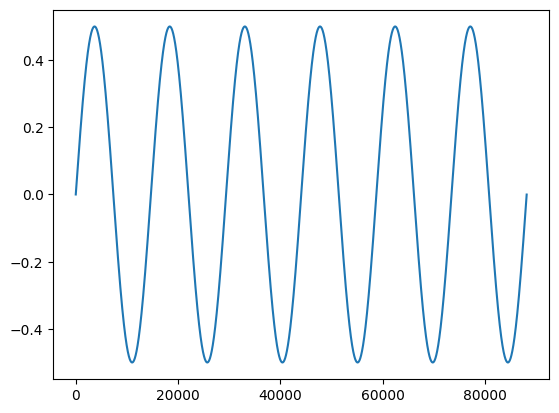

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

SRATE = 44100

# oscilador sinusoidad con un(A,1), frecuncia, duracion y volumen determinados
def osc(freq,dur,vol):      
    return vol * np.sin(2*np.pi*np.arange(int(SRATE*dur))*freq/SRATE)


o = osc(3,2,0.5)
plt.plot(o)

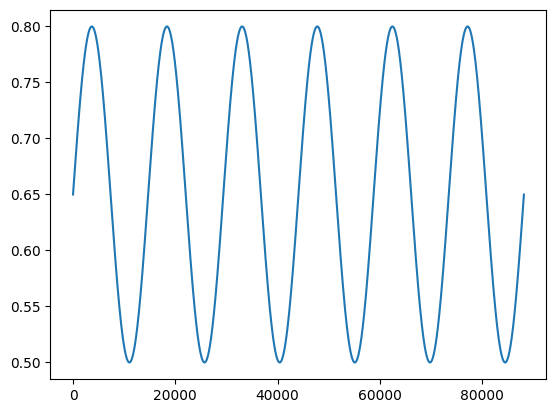

In [3]:
# modulador: oscilador entre dos valores [v0,v1] con 0<=v0<v0<=1

def moduladora(frec,dur,v0,v1):
    o = osc(frec,dur,1)
    return ((v1-v0)*o+ (v1+v0))/2

m = moduladora(3,2,0.5,0.8)

plt.plot(m)

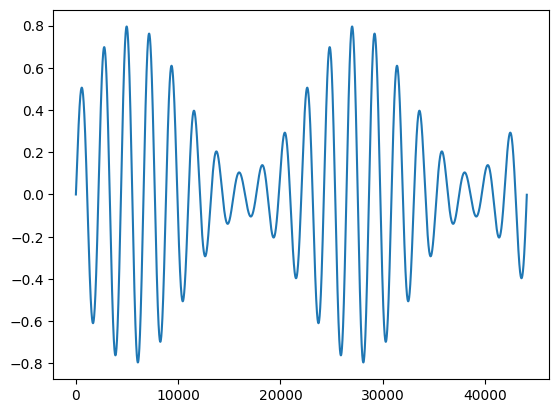

In [4]:
# señal modulad(A,1), en amplitud

def am(freq,dur,vol,freqM,v0,v1):
    o = osc(freq,dur,vol)
    m = moduladora(freqM,dur,v0,v1)
    return o*m


a = am(freq=20,dur=1,vol=1,freqM=2,v0=0.1,v1=0.8)
plt.plot(a)



In [5]:
#cómo suena?
b = am(freq=220,dur=4,vol=0.6,freqM=6,v0=0.1,v1=0.6)
sd.play(b,SRATE)

In [6]:

def harmOsc(freq,amps, dur,vol):
    o = np.zeros(int(SRATE*dur))
    for i,v in enumerate(amps):
        o += osc(freq*i,dur,amps[i])
    return vol*o


sd.play(osc(110,3,0.5))
sd.wait()

s = harmOsc(110,[1,0.5,0.3,0.6,0.2,0.1,0.2,0.1,0.05,0.3,0.2,0.15],3,0.5)
sd.play(s,SRATE)

In [7]:
s = harmOsc(110,[1,0,0.4,0,0.2,0,0.1,0,0.05,0.1,0,0.15],4,0.5)
sd.play(s,SRATE)

In [8]:
# hams clarinete
amps = [0.5,0,0.37,0.04,0,0.1,0,0.012]

s = harmOsc(250,amps,4,0.5)
sd.play(s,SRATE)

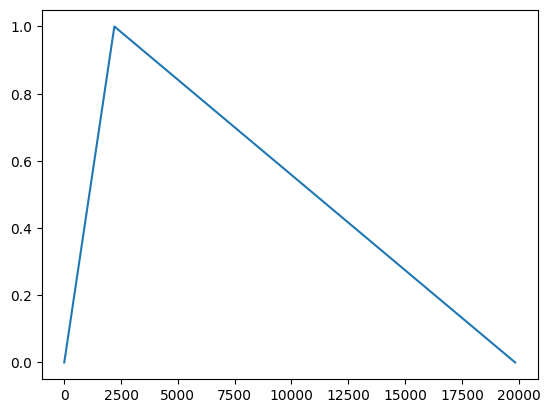

In [9]:
# Envolvente básica

def envolvente(attack,release):
    return np.concatenate([np.linspace(0,1,int(SRATE*attack)),np.linspace(1,0,int(SRATE*release))])

env = envolvente(0.05,0.4)
plt.plot(env)

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


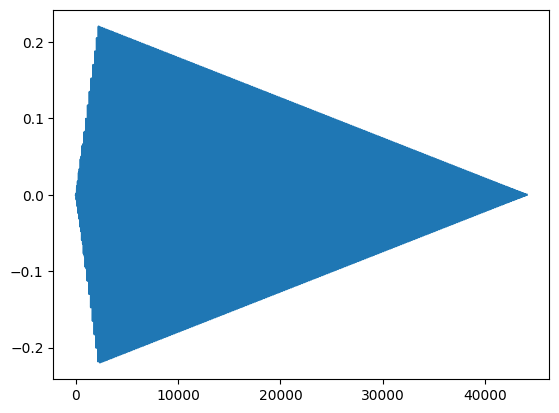

In [10]:
dur = 1
attack = 0.05
s = harmOsc(250,amps,dur,0.5)*envolvente(attack,dur-attack)

plt.plot(s)
sd.play(s,SRATE)



In [11]:
# cumpleaños feliz

names = list('CDEFGABcdefgab')
freqs = [523.251, 587.33, 659.255, 698.456, 783.991, 880, 987.767]
freqs = freqs + [f*2 for f in freqs]

# bajamos una octaba
freqs = [f/2 for f in freqs]

part = [('G',0.5),('G',0.5),('A',1), ('G',1), ('c',1), ('B',2), ('G',0.5), ('G',0.5), ('A',1), ('G',1), ('d',1), ('c',2), ('G',0.5), ('G',0.5), ('g',1), ('e',1), ('c',1), ('B',1), ('A',1), ('f',0.5), ('f',0.5),  ('e',1), ('c',1), ('d',1), ('c',2), ('G',1), ('G',1), ('A',1), ('G',1), ('c',1), ('B',1), ('G',1), ('G',1), ('A',1), ('G',1), ('d',1), ('c',1), ('G',1), ('G',1), ('g',1), ('e',1), ('c',1), ('B',1), ('A',1), ('f',1), ('f',1), ('e',1), ('c',1), ('d',1), ('c',1)]


for n in part:
    f = freqs[names.index(n[0])]
    print(f'Playing {n[0]} freq {f} dur {n[1]}')
    s = harmOsc(f,[0.5,0,0.37,0.04,0,0.1,0,0.012],n[1],0.5)*envolvente(0.05,n[1]-0.05)
    sd.play(s,SRATE)
    sd.wait()

Playing G freq 391.9955 dur 0.5
Playing G freq 391.9955 dur 0.5
Playing A freq 440.0 dur 1
Playing G freq 391.9955 dur 1
Playing c freq 523.251 dur 1
Playing B freq 493.8835 dur 2
Playing G freq 391.9955 dur 0.5
Playing G freq 391.9955 dur 0.5
Playing A freq 440.0 dur 1
Playing G freq 391.9955 dur 1
Playing d freq 587.33 dur 1
Playing c freq 523.251 dur 2
Playing G freq 391.9955 dur 0.5
Playing G freq 391.9955 dur 0.5
Playing g freq 783.991 dur 1
Playing e freq 659.255 dur 1
Playing c freq 523.251 dur 1
Playing B freq 493.8835 dur 1
Playing A freq 440.0 dur 1
Playing f freq 698.456 dur 0.5
Playing f freq 698.456 dur 0.5
Playing e freq 659.255 dur 1
Playing c freq 523.251 dur 1
Playing d freq 587.33 dur 1
Playing c freq 523.251 dur 2
Playing G freq 391.9955 dur 1
Playing G freq 391.9955 dur 1
Playing A freq 440.0 dur 1
Playing G freq 391.9955 dur 1
Playing c freq 523.251 dur 1
Playing B freq 493.8835 dur 1
Playing G freq 391.9955 dur 1
Playing G freq 391.9955 dur 1
Playing A freq 440.0 